In [7]:
def f1(list_of_list):
    result = []
    for inner_list in list_of_list:
        for x in inner_list:
            if x not in result:
                result.append(x)
    return result

def f2(list_of_list):
    flat_list = []
    for inner_list in list_of_list:
        flat_list.extend(inner_list)
    return [
        x for i, x in enumerate(flat_list)
        if flat_list.index(x) == i]

def f3(list_of_list):
    result = []
    seen = set()
    for inner_list in list_of_list:
        for x in inner_list:
            if x not in seen:
                result.append(x)
                seen.add(x)
    return result

In [8]:
test_list = [[1, 0, -1], [-1, 0, 1], [-1, 0, 1],
                           [1, 2, 3], [3, 4, 1]]

In [68]:
%time
f1(test_list)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


[1, 0, -1, 2, 3, 4]

In [69]:
%time
f2(test_list)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


[1, 0, -1, 2, 3, 4]

In [70]:
%time
f3(test_list)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs


[1, 0, -1, 2, 3, 4]

In [ ]:
f1 < f3 < f2

In [72]:
def sqsum1():
	return sum(x**2 if x > 0 for x in nums)


SyntaxError: invalid syntax (751709328.py, line 2)

In [73]:
def sqsum2():
  	return sum(x^2 for x in nums if x > 0)

In [75]:
def sqsum4():
  	return sum(x**2 for x in nums if x > 0)

In [100]:
st = '''10.1.2.1 - car [01/Mar/2022:13:05:05 +0900] "GET /python HTTP/1.0" 200 2222'''

In [106]:
st.split('[')[1].split(']')[0]

'01/Mar/2022:13:05:05 +0900'

In [94]:
"""
Content of "log.txt":
10.1.2.1 - car [01/Mar/2022:13:05:05 +0900] "GET /python HTTP/1.0" 200 2222
10.1.1.9 - bike [01/Mar/2022:13:05:10 +0900] "GET /python HTTP/1.0" 200 2222

Expected output:
01/Mar/2022:13:05:05 +0900
01/Mar/2022:13:05:10 +0900
"""
import re
def parse1():
    for line in open("log.txt"):
        print(line.split("[")[1].split("]")[0])

def parse2():
    for line in open("log.txt", "r"):
        print(line.split()[3].strip("[]"))

def parse3():
    for line in open("log.txt", "r"):
        print(" ".join(line.split("[" or "]")[3:5]))

def parse4():
    for line in open("log.txt", "rw"):
        print(" ".join(line.split()[3:5]).strip("[]"))
  
def parse5():
    for line in open("log.txt"):
        print(re.split("\[|\]", line)[1])

In [112]:
parse5()

01/Mar/2022:13:05:05 +0900
01/Mar/2022:13:05:10 +0900


In [95]:
print(parse5())

01/Mar/2022:13:05:05 +0900
01/Mar/2022:13:05:10 +0900
None


In [113]:
a = [1, 2, 4, 5]

In [118]:
a.pop(2)

4

In [85]:
print(parse5())

None


## Cartoonish

In [1]:
!ls

1646840533812.jpeg     Module-2               Untitled.ipynb
Module-0-Using-Pycharm Module-3
Module-1               README.md


In [35]:
path  = '16468405338121.jpeg' 

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

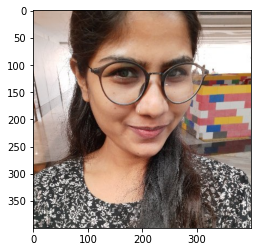

In [37]:
img = cv2.imread(path)
plt.imshow(img[:,:,::-1])

In [53]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

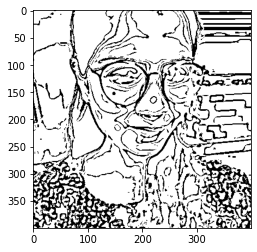

In [55]:
plt.imshow(edges, cmap='gray')

In [56]:
color = cv2.bilateralFilter(img, 10, 250, 250)
cartoon = cv2.bitwise_and(color, color, mask=edges)

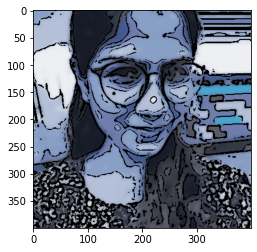

In [57]:
plt.imshow(cartoon)

In [43]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

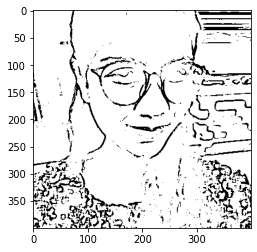

In [44]:
line_size = 7
blur_value = 7
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap='gray')

In [45]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

In [46]:
total_color = 9
img = color_quantization(img, total_color)

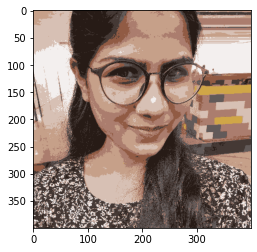

In [47]:
plt.imshow(img)

In [48]:
blurred = cv2.bilateralFilter(img, d=7, sigmaColor=200,sigmaSpace=200)

In [49]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

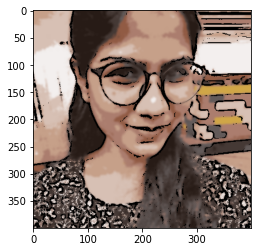

In [50]:
plt.imshow(cartoon)

In [59]:
cv2.imwrite('photo2.jpeg', cartoon)

True